# Data Misteri Ramadan 2019

Ini adalah explorasi dalam tantangan data misteri 2019. Data bisa didapatkan dari [link](http://bit.ly/misteridataramadan2019) berikut.

## Konteks

## Problems

Ini adalah main problem-nya:
    
    1. Berapa Banyak Karyawan yg melakukan mudik? (asumsi mudik adalah karyawan yg tidak ada di jabodetabek saat hari H, 5 Juni 2019)
    2. Sebutkan 5 Kota paling banyak dikunjungi?
    3. Hari Apakah menjadi hari paling banyak mudik?
    4. Divisi mana yg paling banyak melakukan mudik? 
    5. Berapa banyak Karyawan yg diminta oleh2 "Lapis Legit Z" langsung dari Tokonya
    
    6. Umur atau gender yang mudik?? 
    7. [Viz] garis jabo ke non-jabo ??
    8. [Viz] Move the date

## Steps

    [ ] Importing the package
    [ ] Importing the data
        [ ] Summarize it
        [ ] Check Uniqueness
    [ ] Simple Explore and Cleansing
    [ ] Transformation
    
## Consideration

    a. Karyawan yg pindah pindah kota
    b. Karyawan yg di wawancara langsung sudah dikota selain Jabo

## Summary

....

In [30]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
PATH_DATA_RAW='../data/raw/'
PATH_DATA_MAN='../data/manipulate/'

## Importing The Data

In [3]:
dprof=pd.read_csv(PATH_DATA_RAW+'data_profil.csv')
dcat_lok=pd.read_csv(PATH_DATA_RAW+'catatan_lokasi.csv')

In [4]:
dprof.head()

,id,jenis_kelamin,divisi,umur
0,1,Laki-laki,Customer Service,34
1,2,Laki-laki,Data Engineer,26
2,3,Laki-laki,Software Engineer,28
3,4,Perempuan,Business Intelligence,21
4,5,Perempuan,Software Engineer,21


In [5]:
dcat_lok.head()

,id,tanggal,lokasi_dominan
0,1,21/05/19,Jakarta Pusat
1,2,21/05/19,Kabupaten Bogor
2,3,21/05/19,Jakarta Pusat
3,4,21/05/19,Kota Tangerang
4,5,21/05/19,Kota Bogor


#### Summarize

In [6]:
dprof.describe()

,id,umur
count,100.000000,100.000000
mean,50.500000,27.660000
std,29.011492,4.346646
min,1.000000,21.000000
25%,25.750000,24.000000
50%,50.500000,27.000000
75%,75.250000,32.000000
max,100.000000,35.000000


In [7]:
dcat_lok.describe()

,id
count,1600.000000
mean,50.500000
std,28.875095
min,1.000000
25%,25.750000
50%,50.500000
75%,75.250000
max,100.000000


#### Check Uniqueness

In [8]:
## dprof should have primary key on id
len(dprof.id)==len(dprof.id.unique())

True

In [9]:
## dcat_lok seems not unique on id
len(dcat_lok.id)==len(dcat_lok.id.unique())

False

In [10]:
len(dcat_lok.id.unique())

100

## Simple Explore and Cleansing

In [11]:
dprof.groupby('divisi').size()

divisi
Business Intelligence    21
Customer Service         15
Data Engineer            14
Data Science             10
Marketing                 9
Software Engineer        31
dtype: int64

In [12]:
dprof.groupby(['jenis_kelamin']).size()

jenis_kelamin
Laki-laki    68
Perempuan    32
dtype: int64

In [13]:
dprof.groupby(['divisi','jenis_kelamin']).size()

divisi                 jenis_kelamin
Business Intelligence  Laki-laki        16
                       Perempuan         5
Customer Service       Laki-laki        12
                       Perempuan         3
Data Engineer          Laki-laki        11
                       Perempuan         3
Data Science           Laki-laki         4
                       Perempuan         6
Marketing              Laki-laki         4
                       Perempuan         5
Software Engineer      Laki-laki        21
                       Perempuan        10
dtype: int64

In [14]:
dprof.umur.isnull().sum()

0

C:\Users\Aska\Anaconda3\envs\py36\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


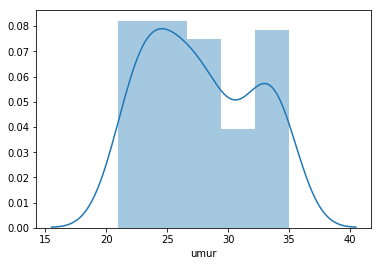

In [15]:
sns.distplot(dprof.umur)

In [16]:
dcat_lok.groupby('id').size()

id
1      16
2      16
3      16
4      16
5      16
6      16
7      16
8      16
9      16
10     16
11     16
12     16
13     16
14     16
15     16
16     16
17     16
18     16
19     16
20     16
21     16
22     16
23     16
24     16
25     16
26     16
27     16
28     16
29     16
30     16
       ..
71     16
72     16
73     16
74     16
75     16
76     16
77     16
78     16
79     16
80     16
81     16
82     16
83     16
84     16
85     16
86     16
87     16
88     16
89     16
90     16
91     16
92     16
93     16
94     16
95     16
96     16
97     16
98     16
99     16
100    16
Length: 100, dtype: int64

In [17]:
## Example id
dcat_lok[dcat_lok.id==10]

,id,tanggal,lokasi_dominan
9,10,21/05/19,Jakarta Timur
109,10,22/05/19,Kabupaten Bekasi
209,10,23/05/19,Kota Tangerang
309,10,24/05/19,Kabupaten Bantul
409,10,25/05/19,Kota Yogyakarta
509,10,26/05/19,Kabupaten Bantul
609,10,27/05/19,Kabupaten Bantul
709,10,28/05/19,Kota Yogyakarta
809,10,29/05/19,Kabupaten Bantul
909,10,30/05/19,Kota Yogyakarta


In [18]:
Jabo_Cities=['jakarta','tangerang','bogor','bekasi','depok']

In [19]:
len(dcat_lok.lokasi_dominan.unique())

28

In [20]:
dcat_lok.lokasi_dominan.unique()

array(['Jakarta Pusat', 'Kabupaten Bogor', 'Kota Tangerang', 'Kota Bogor',
       'Kota Depok', 'Jakarta Timur', 'Kota Bekasi', 'Jakarta Selatan',
       'Jakarta Utara', 'Jakarta Barat', 'Kabupaten Tangerang',
       'Kabupaten Bekasi', 'Kota Tangerang Selatan', 'Kota Yogyakarta',
       'Kabupaten Bantul', 'Kabupaten Wonogiri', 'Kota Medan',
       'Kota Manado', 'Kota Bandung', 'Kabupaten Tasikmalaya',
       'Kota Padang', 'Kabupaten Sleman', 'Kota Bandar Lampung',
       'Kota Semarang', 'Kabupaten Lampung Selatan', 'Kota Surabaya',
       'Kabupaten Kebumen', 'Kota Banda Aceh'], dtype=object)

In [21]:
dcat_lok.groupby('lokasi_dominan').agg({'id':pd.Series.nunique})

,id
lokasi_dominan,
Jakarta Barat,23
Jakarta Pusat,21
Jakarta Selatan,26
Jakarta Timur,25
Jakarta Utara,24
Kabupaten Bantul,9
Kabupaten Bekasi,20
Kabupaten Bogor,18
Kabupaten Kebumen,2


In [22]:
dcat_lok.groupby('tanggal').agg({'id':pd.Series.nunique})

,id
tanggal,
01/06/19,100
02/06/19,100
03/06/19,100
04/06/19,100
05/06/19,100
21/05/19,100
22/05/19,100
23/05/19,100
24/05/19,100


## Transformation

In [23]:
def is_Jabo(x):
    s=0
    for cc in Jabo_Cities:
        if cc in x.lower():
            s=1
    return s

In [24]:
dcat_lok['is_jabo']=dcat_lok.lokasi_dominan.apply(lambda x: is_Jabo(x))

In [25]:
dcat_temp_list=[]
for iid in dcat_lok.id.unique():
    dcat_temp=dcat_lok[dcat_lok.id==iid]
    dcat_temp['is_jabo_prev'] = dcat_temp.is_jabo.shift(1)
    dcat_temp_list.append(dcat_temp)
    
dcat_lok2=pd.concat(dcat_temp_list)

C:\Users\Aska\Anaconda3\envs\py36\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [26]:
dcat_lok2.head()

,id,tanggal,lokasi_dominan,is_jabo,is_jabo_prev
0,1,21/05/19,Jakarta Pusat,1,NaN
100,1,22/05/19,Jakarta Pusat,1,1.0
200,1,23/05/19,Jakarta Pusat,1,1.0
300,1,24/05/19,Kota Bekasi,1,1.0
400,1,25/05/19,Kota Bekasi,1,1.0


In [35]:
## Create Null Data (Visualization Purpose)
# pd.DataFrame([[1,1],[1,0],[0,1],[0,0]],columns=['is_jabo','is_jabo_prev'])

st=[[1,1],[1,0],[0,1],[0,0]]
rows=[]
for dd in dcat_lok2.tanggal.unique():
    for st0 in st:
        row0=[np.nan,dd,np.nan]+st0
        rows.append(row0)
        
df_null=pd.DataFrame(rows,columns=dcat_lok2.columns)
dcat_lok3=pd.concat([dcat_lok2,df_null])

In [42]:
dprof.id=dprof.id.astype(float)

In [45]:
dcat_lok4=pd.merge(dcat_lok3,dprof,on='id',how='left')

In [51]:
dcat_lok4.to_csv(PATH_DATA_MAN+'lokasi_and_profil.csv',index=False,sep=';')

In [52]:
# pd.read_csv(PATH_DATA_MAN+'lokasi_and_profil.csv')

In [53]:
dcat_lok4

,id,tanggal,lokasi_dominan,is_jabo,is_jabo_prev,jenis_kelamin,divisi,umur
0,1.0,21/05/19,Jakarta Pusat,1,NaN,Laki-laki,Customer Service,34.0
1,1.0,22/05/19,Jakarta Pusat,1,1.0,Laki-laki,Customer Service,34.0
2,1.0,23/05/19,Jakarta Pusat,1,1.0,Laki-laki,Customer Service,34.0
3,1.0,24/05/19,Kota Bekasi,1,1.0,Laki-laki,Customer Service,34.0
4,1.0,25/05/19,Kota Bekasi,1,1.0,Laki-laki,Customer Service,34.0
5,1.0,26/05/19,Kota Medan,0,1.0,Laki-laki,Customer Service,34.0
6,1.0,27/05/19,Kota Bekasi,1,0.0,Laki-laki,Customer Service,34.0
7,1.0,28/05/19,Kota Padang,0,1.0,Laki-laki,Customer Service,34.0
8,1.0,29/05/19,Kota Padang,0,0.0,Laki-laki,Customer Service,34.0
9,1.0,30/05/19,Kota Padang,0,0.0,Laki-laki,Customer Service,34.0
